In [55]:
!pip install folium

In [56]:
import requests
import numpy as np
import pandas as pd
import json
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [7]:
client_id = "05SU4W33TUOU04RDIVWSZQFLWY3LDPRWFLZHV4LFYHELLGXM"
client_secret = "3KJP1MG2NRUDOGXKC044MBR4BOHJMX3EG4YZSBUN2WVPIRUA"

def call_FS(query):
    "'Returns a JSON package of the query'"
    endpoint = "https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={}&query={}&v=20180602".format(client_id,client_secret,"1.4361,103.7859",query)
    response = requests.get(endpoint)
    json_data = response.json()['response']['venues']
    return json_data

#lat,loc = 1.4361,103.7859

In [37]:
def clean_data(json_data):
    lst = []
    for item in json_data:
        if item['location']['country'] == 'Singapore':
            dic = {}
            dic['name'] = item['name']
            dic['lat'] = item['location']['lat']
            dic['lng'] = item['location']['lng']
            dic['address_list'] = item['location']['formattedAddress']
            lst.append(dic)
    df = pd.DataFrame(lst)
    return df       

In [20]:
#Calling the FS API for a few query, eg. Coffee, Tea, Cafe
query = call_FS('coffee')
query = query + call_FS('tea')
query = query + call_FS('cafe')

In [38]:
#Cleaning the data and extracting only the key information for the analysis
df = clean_data(query)

In [39]:
df.head(5)

,name,lat,lng,address_list
0,The Coffee Bean & Tea Leaf,1.435802,103.786359,"[#02-33, Causeway Point (1 Woodlands Sq.), 738..."
1,May Coffee,1.433361,103.779800,"[#01-59 Marsiling Mall Hawker Centre, 738620, ..."
2,ST 11 Coffee House,1.433292,103.775685,"[#01-07 167 Woodlands Street 11, 730167, Singa..."
3,Helmi Bodek Coffee House,1.435789,103.785953,[Singapore]
4,Banquet Signature Coffee Shop,1.435868,103.786118,[Singapore]


In [46]:
#Check if there is any duplicates in the search feedback
df[df.duplicated(['lat','lng'])]

#Address lists are different, hence they are not duplicates, hence we do not need to remove any of these series from the dataset

,name,lat,lng,address_list
28,The Coffee Bean & Tea Leaf,1.435802,103.786359,"[#02-33, Causeway Point (1 Woodlands Sq.), 738..."
43,Long Hua Coffee And Tea,1.433037,103.779811,[Marsiling Mall Hawker Centre (4 Woodlands Str...
48,The Coffee Bean & Tea Leaf,1.330599,103.795576,[1 Fifth Avenue #01-04 Guthrie House (1 Fifth ...
49,The Coffee Bean & Tea Leaf,1.333490,103.743111,"[#01-06, Jem (50 Jurong Gateway Rd), 608549, S..."


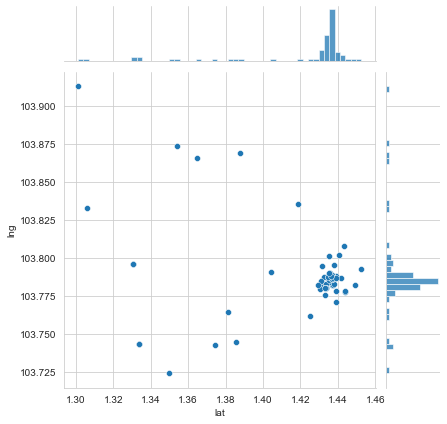

In [52]:
#Plotting the coordinates in a scatter plot for visualization only
sns.set_style('whitegrid')
sns.jointplot(x='lat',y='lng',data=df,kind='scatter')

In [95]:
sg_map = folium.Map(location=[1.4361,103.7859],zoom_start=15)
features = folium.map.FeatureGroup()
for i in df.index:
    coord = [df.iloc[i]['lat'],df.iloc[i]['lng']]
    name = df.iloc[i]['name']
    address = df.iloc[i]['address_list']
    features.add_child(folium.features.CircleMarker(coord, radius=3, color='red',icon_color='red'))
    sg_map.add_child(features)
    folium.Marker(coord,popup=name,
                  icon=folium.Icon(
                      color="red", icon="info-sign")).add_to(sg_map)

sg_map

## These are the coffee/tea houses/cafes near to the target location of the shopping mall called Causeway Point


In [99]:
sg_map = folium.Map(location=[1.4361,103.7859],zoom_start=15)
sg_map